In [1]:
!pip install -r requirements.txt
#!sudo apt-get install tcl-dev tk-dev python-tk python3-tk
# https://www.pyimagesearch.com/2015/08/24/resolved-matplotlib-figures-not-showing-up-or-displaying/

Looking in indexes: https://nexus.cnj.jus.br/repository/pypi-all/simple
You are using pip version 18.1, however version 21.2.4 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
#http://scipy-lectures.org/advanced/image_processing/
from scipy import ndimage
import numpy as np

/home/emmanuel/.pyenv/versions/3.6.8/envs/cranium/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/emmanuel/.pyenv/versions/3.6.8/envs/cranium/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/emmanuel/.pyenv/versions/3.6.8/envs/cranium/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/

In [3]:
dataset = keras.datasets.fashion_mnist

((imagens_treino, identificacoes_treino), (imagens_teste, identificacoes_teste)) = dataset.load_data()

print(len(imagens_treino))
print(imagens_treino.shape)
print(imagens_teste.shape)
print(len(identificacoes_teste))

60000
(60000, 28, 28)
(10000, 28, 28)
10000


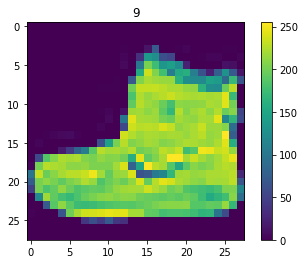

In [4]:
plt.imshow(imagens_treino[0])
plt.title(identificacoes_treino[0])
plt.colorbar()

In [5]:
'''
https://github.com/zalandoresearch/fashion-mnist

0 	T-shirt/top
1 	Trouser
2 	Pullover
3 	Dress
4 	Coat
5 	Sandal
6 	Shirt
7 	Sneaker
8 	Bag
9 	Ankle boot

'''
labels = ['T-shirt/top', 
'Trouser',
'Pullover',
'Dress',
'Coat',
'Sandal',
'Shirt',
'Sneaker',
'Bag',
'Ankle boot']

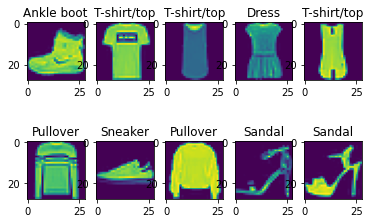

In [6]:
for indice in range(10):
    plt.subplot(2, 5, indice+1)
    plt.imshow(imagens_treino[indice])
    plt.title(labels[identificacoes_treino[indice]])

In [7]:
# Normalização para diminuir a perda
imagens_treino = imagens_treino/float(255) 

modelo =  keras.Sequential(
    #entrada
    [keras.layers.Flatten(input_shape=(imagens_treino.shape[1], imagens_treino.shape[2])),
    #processamento
     # 256 unidades --> múltiplo de 2
     keras.layers.Dense(256, activation=tf.nn.relu),
     #keras.layers.Dense(128, activation=tf.nn.relu),
     #keras.layers.Dense(64, activation=tf.nn.relu),
     keras.layers.Dropout(0.3),
     #saida
     keras.layers.Dense(len(labels), activation=tf.nn.softmax)
    
    ])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [8]:

hyperparametros = {'learning_rate':0.002,# learning_rate padrão = 0.001
                   'validation_split':0.2,
                   'epochs':5,
                   'alterar_batch_size': False
                   }

if(hyperparametros['alterar_batch_size']):
    tamanho_lote_treinamento = int(imagens_treino.shape[0]*(1-hyperparametros['validation_split'])/100)
else:
    tamanho_lote_treinamento=None


def treinar_modelo():

    adam = keras.optimizers.Adam(learning_rate=hyperparametros['learning_rate'])
    
    callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss'),
                 keras.callbacks.ModelCheckpoint(filepath='melhor_modelo.hdf5',
                                                 monitor='val_loss',
                                                 save_best_only=True)]
    modelo.compile(optimizer=adam,
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

    historico_treinamento = modelo.fit(imagens_treino,
                                       identificacoes_treino,
                                       batch_size=(tamanho_lote_treinamento),
                                       epochs=hyperparametros['epochs'],
                                       callbacks=callbacks,
                                       validation_split=hyperparametros['validation_split'])

    return historico_treinamento


In [9]:
historico_1 = treinar_modelo()
historico_1.history

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 4s 78us/sample - loss: 0.5478 - acc: 0.8017 - val_loss: 0.4166 - val_acc: 0.8497
Epoch 2/5
48000/48000 [==============================] - 4s 75us/sample - loss: 0.4316 - acc: 0.8437 - val_loss: 0.3882 - val_acc: 0.8595
Epoch 3/5
48000/48000 [==============================] - 4s 75us/sample - loss: 0.4020 - acc: 0.8516 - val_loss: 0.3731 - val_acc: 0.8633
Epoch 4/5
48000/48000 [==============================] - 4s 75us/sample - loss: 0.3872 - acc: 0.8563 - val_loss: 0.3655 - val_acc: 0.8674
Epoch 5/5
48000/48000 [==============================] - 4s 74us/sample - loss: 0.3664 - acc: 0.8649 - val_loss: 0.3666 - val_acc: 0.8703


{'loss': [0.547810840467612,
  0.43161065427958967,
  0.4019679948488871,
  0.38718024411300817,
  0.36644024710108836],
 'acc': [0.8016875, 0.8436875, 0.851625, 0.8563333, 0.864875],
 'val_loss': [0.41655275197823843,
  0.3881933149496714,
  0.3730593291620413,
  0.365472367922465,
  0.36659857352574665],
 'val_acc': [0.84975, 0.8595, 0.86333334, 0.8674167, 0.8703333]}

In [10]:
def plotar(historico, metrica):
    
    if(metrica=='Acurácia'):
        parametro_treino = 'acc'
        parametro_validacao = 'val_acc'
    
    if(metrica=='Perda'):
        parametro_treino = 'loss'
        parametro_validacao = 'val_loss'
    
    plt.plot(historico.history[parametro_treino])
    plt.plot(historico.history[parametro_validacao])
    plt.legend(['treino', 'avaliacao'])
    plt.title(metrica + ' por épocas')
    plt.xlabel('épocas')
    plt.ylabel(metrica)

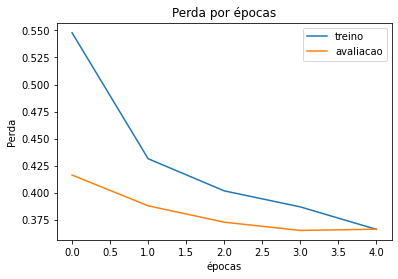

In [11]:
plotar(historico_1, 'Perda')

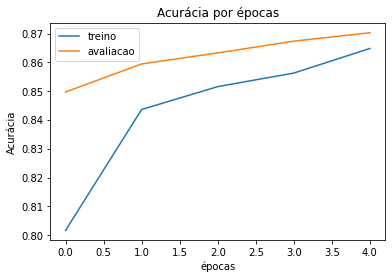

In [12]:
plotar(historico_1,'Acurácia')

In [13]:
testes  = modelo.predict(imagens_teste)

In [14]:
perda, acuracia = modelo.evaluate(imagens_teste, identificacoes_teste)

10000/10000 [==============================] - 0s 32us/sample - loss: 68.0762 - acc: 0.8517


In [15]:
modelo.save('modelo.h5')

In [16]:
modelo_salvo = load_model('modelo.h5')
testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print('Resultado teste: ', np.argmax(testes_modelo_salvo[1]))
print('Número imagem teste: ', identificacoes_teste[1])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Resultado teste:  2
Número imagem teste:  2


In [17]:
sumario = modelo_salvo.summary()
sumario

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [18]:
layer_1 = modelo.layers[1]
pesos_camada_dense = layer_1.get_weights()[0]

In [19]:
vieses_camada_dense = layer_1.get_weights()[1]
vieses_camada_dense.shape

(256,)

In [20]:
pesos_camada_dense_zerados = np.zeros(pesos_camada_dense.shape)

pesos_camada_dense_aleatorios = np.random.rand(pesos_camada_dense.shape[0],pesos_camada_dense.shape[1] )

layer_1.set_weights([pesos_camada_dense_aleatorios, vieses_camada_dense])


In [21]:
historico_2 = treinar_modelo()

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 4s 79us/sample - loss: 68.7517 - acc: 0.4949 - val_loss: 8.6961 - val_acc: 0.7232
Epoch 2/5
48000/48000 [==============================] - 4s 76us/sample - loss: 9.1822 - acc: 0.6823 - val_loss: 2.8884 - val_acc: 0.7888
Epoch 3/5
48000/48000 [==============================] - 4s 76us/sample - loss: 2.7471 - acc: 0.7411 - val_loss: 1.3210 - val_acc: 0.7980
Epoch 4/5
48000/48000 [==============================] - 4s 78us/sample - loss: 0.9602 - acc: 0.7913 - val_loss: 0.7450 - val_acc: 0.7830
Epoch 5/5
48000/48000 [==============================] - 4s 76us/sample - loss: 0.5655 - acc: 0.8244 - val_loss: 0.5249 - val_acc: 0.8357


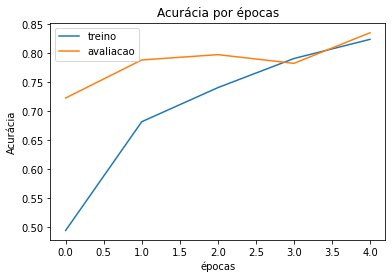

In [22]:
plotar(historico_2, 'Acurácia')

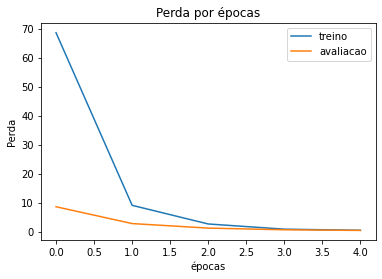

In [23]:
plotar(historico_2, 'Perda')

In [24]:
modelo.get_config()

{'name': 'sequential',
 'layers': [{'class_name': 'Flatten',
   'config': {'name': 'flatten',
    'trainable': True,
    'batch_input_shape': (None, 28, 28),
    'dtype': 'float32',
    'data_format': 'channels_last'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'dtype': 'float32',
    'units': 256,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None, 'dtype': 'float32'}},
    'bias_initializer': {'class_name': 'Zeros',
     'config': {'dtype': 'float32'}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dropout',
   'config': {'name': 'dropout',
    'trainable': True,
    'dtype': 'float32',
    'rate': 0.3,
    'noise_shape': None,
    'seed': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_1',
    'trainable': True,
    

In [25]:
vieses_camada_dense_zerados = np.zeros(vieses_camada_dense.shape)

vieses_camada_dense_aleatorios = np.random.rand(vieses_camada_dense.shape[0], )

layer_1.set_weights([pesos_camada_dense_aleatorios, vieses_camada_dense_aleatorios])

In [26]:
historico_3 = treinar_modelo()

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 4s 80us/sample - loss: 24.9402 - acc: 0.4590 - val_loss: 3.8691 - val_acc: 0.6941
Epoch 2/5
48000/48000 [==============================] - 4s 76us/sample - loss: 4.4722 - acc: 0.6640 - val_loss: 2.0534 - val_acc: 0.7441
Epoch 3/5
48000/48000 [==============================] - 4s 77us/sample - loss: 1.6366 - acc: 0.7423 - val_loss: 1.1838 - val_acc: 0.7853
Epoch 4/5
48000/48000 [==============================] - 4s 78us/sample - loss: 0.8168 - acc: 0.7949 - val_loss: 0.5956 - val_acc: 0.8425
Epoch 5/5
48000/48000 [==============================] - 4s 76us/sample - loss: 0.5405 - acc: 0.8285 - val_loss: 0.4883 - val_acc: 0.8491


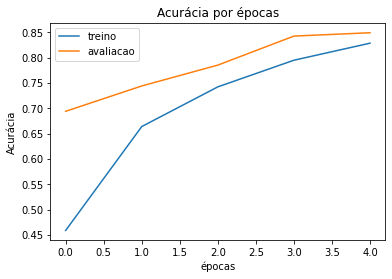

In [27]:
plotar(historico_3, 'Acurácia')

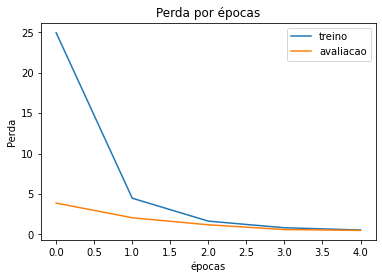

In [28]:
plotar(historico_3, 'Perda')

In [29]:
layer_1.set_weights([pesos_camada_dense_aleatorios, vieses_camada_dense_zerados])
historico_4 = treinar_modelo()

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 4s 79us/sample - loss: 17.1521 - acc: 0.4320 - val_loss: 6.6900 - val_acc: 0.6439
Epoch 2/5
48000/48000 [==============================] - 4s 77us/sample - loss: 3.5957 - acc: 0.6578 - val_loss: 1.7631 - val_acc: 0.7524
Epoch 3/5
48000/48000 [==============================] - 4s 80us/sample - loss: 1.4536 - acc: 0.7442 - val_loss: 1.0048 - val_acc: 0.7937
Epoch 4/5
48000/48000 [==============================] - 4s 80us/sample - loss: 0.7463 - acc: 0.8019 - val_loss: 0.5607 - val_acc: 0.8462
Epoch 5/5
48000/48000 [==============================] - 4s 80us/sample - loss: 0.5248 - acc: 0.8343 - val_loss: 0.4733 - val_acc: 0.8512


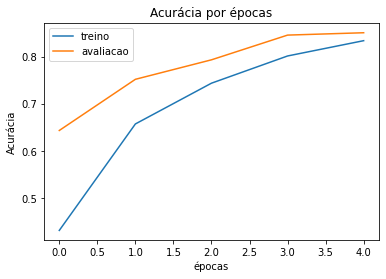

In [30]:
plotar(historico_4, 'Acurácia')

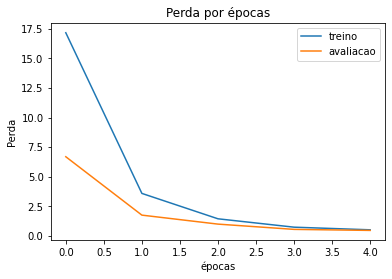

In [31]:
plotar(historico_4, 'Perda')